<a href="https://colab.research.google.com/github/peeush-agarwal/week-based-learning/blob/master/Projects/Name2Lang_Classifier/Predict_language_from_name_of_person.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name to language classifier

+ Dataset
  + Given different files containing 2 columns: Name, Language
+ Build RNN model to take name as input and predict language 

## Import libraries

In [1]:
import os
import glob
import string
import unicodedata
from io import open
import random

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.style.use('dark_background')

import torch
import torch.nn as nn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load dataset

In [2]:
! unzip '/content/drive/My Drive/Projects/Name_To_Language_Classifier/name_language.zip'

Archive:  /content/drive/My Drive/Projects/Name_To_Language_Classifier/name_language.zip
   creating: data/
  inflating: data/eng-fra.txt        
   creating: data/names/
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt    
  inflating: data/names/Italian.txt  
  inflating: data/names/Japanese.txt  
  inflating: data/names/Korean.txt   
  inflating: data/names/Polish.txt   
  inflating: data/names/Portuguese.txt  
  inflating: data/names/Russian.txt  
  inflating: data/names/Scottish.txt  
  inflating: data/names/Spanish.txt  
  inflating: data/names/Vietnamese.txt  


In [0]:
base_path = './data/names/*.txt'

In [0]:
files = glob.glob(base_path)

In [5]:
print(files)

['./data/names/Czech.txt', './data/names/Irish.txt', './data/names/English.txt', './data/names/Spanish.txt', './data/names/Scottish.txt', './data/names/Arabic.txt', './data/names/Polish.txt', './data/names/Portuguese.txt', './data/names/French.txt', './data/names/Greek.txt', './data/names/Japanese.txt', './data/names/Korean.txt', './data/names/Dutch.txt', './data/names/German.txt', './data/names/Italian.txt', './data/names/Russian.txt', './data/names/Chinese.txt', './data/names/Vietnamese.txt']


In [0]:
def fetch_category(filepath):
  return os.path.splitext(os.path.basename(filepath))[0]

In [7]:
fetch_category(files[0])

'Czech'

In [0]:
all_letters = string.ascii_letters + " ;,'"

In [0]:
def unicode_to_ascii(name):
  return ''.join(
      c for c in unicodedata.normalize('NFD', name)
      if unicodedata.category(c) != 'Mn' and c in all_letters
  )

In [10]:
unicode_to_ascii('Ślusàrski')

'Slusarski'

In [0]:
all_categories = []
category_name = {}

for file_ in files:
  with open(file_) as fd:
    category = fetch_category(file_)
    if not category in all_categories:
      all_categories.append(category)
      category_name[category] = list()

    for line in fd:
      name = line.strip().split('\n')[0]
      category_name[category].append(unicode_to_ascii(name))

In [0]:
n_categories = len(all_categories)

## Visualize distribution of names over languages

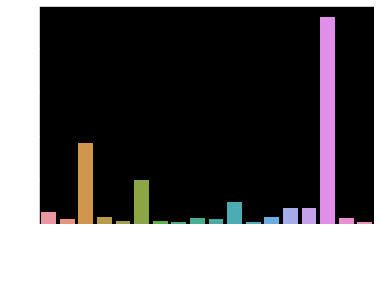

In [13]:
plt_ = sns.barplot(list(category_name.keys()), [len(value) for key, value in category_name.items()])
plt_.set_xticklabels(plt_.get_xticklabels(), rotation=90)
plt.show()

## Data processing

In [0]:
n_letters = len(all_letters)

In [0]:
def char_to_tensor(c):
  tensor = torch.zeros((1, n_letters))
  tensor[0][all_letters.index(c)] = 1
  return tensor

In [16]:
char_to_tensor('a')

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]])

In [17]:
char_to_tensor('B')

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]])

In [0]:
def name_to_tensor(name):
  tensor = torch.empty((len(name), 1, n_letters))
  for idx, c in enumerate(name):
    tensor[idx] = char_to_tensor(c)
  return tensor

In [19]:
t = name_to_tensor('Peeush')
print(t.size(), t)

torch.Size([6, 1, 56]) tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0.

In [0]:
def category_to_tensor(category):
  return torch.tensor([all_categories.index(category)])

In [21]:
category_to_tensor('French')

tensor([8])

In [0]:
def output_to_category(output_tensor, k = 1):
  values, indices = output_tensor.topk(k)

  out = []
  for index in indices[0]:
    # print(index)
    if index.item() in range(0, n_categories):
      out.append(all_categories[index.item()])
  
  return out

In [52]:
sample_out = torch.randn((1, 10))
print(sample_out)
output_to_category(sample_out, k=2)

tensor([[ 1.5844, -2.0110,  0.5742,  0.8236,  1.9281,  0.4442,  0.5871, -1.1790,
          1.6155, -1.5817]])


['Scottish', 'French']

In [0]:
def random_choice(list_):
  return list_[random.randint(0, len(list_)-1)]

In [25]:
random_choice(all_categories)

'Czech'

In [0]:
def random_training_sample():
  category = random_choice(all_categories)
  name = random_choice(category_name[category])
  return category, name, category_to_tensor(category), name_to_tensor(name)

In [27]:
random_training_sample()

('Portuguese',
 'Gouveia',
 tensor([7]),
 tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0

## Fetch computing device

In [28]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


## Build RNN model

In [0]:
class Basic_RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(Basic_RNN, self).__init__()

    self.hidden_size = hidden_size
    self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
    self.i2o = nn.Linear(input_size + hidden_size, output_size)
    self.softmax = nn.LogSoftmax(dim=1)
  
  def forward(self, input_, hidden):
    combined = torch.cat((input_, hidden), dim=1)

    hidden = self.i2h(combined)
    output = self.i2o(combined)
    output = self.softmax(output)

    return output, hidden
  
  def init_hidden(self):
    return torch.zeros((1, self.hidden_size))

In [0]:
hidden_size = 128
model = Basic_RNN(n_letters, hidden_size, n_categories).to(device)
criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [0]:
def infer(name):
  model.eval()

  name_tensor = name_to_tensor(name).to(device)
  hidden = model.init_hidden().to(device)

  for idx in range(name_tensor.size()[0]):
    output, hidden = model(name_tensor[idx], hidden)
  
  return output

In [34]:
out = infer('Albert')
print(out)
print(output_to_category(out))
print(output_to_category(out, k=3))

tensor([[-2.8183, -2.9764, -2.8466, -2.8015, -2.8777, -2.8513, -2.8608, -2.8780,
         -2.9691, -2.8490, -3.0340, -2.9771, -2.8922, -2.9239, -2.8747, -2.8115,
         -2.9524, -2.8682]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)
['Spanish']
['Spanish', 'Russian', 'Czech']


In [0]:
def train(name_tensor, category_tensor):
  model.train()

  optimizer.zero_grad()

  hidden = model.init_hidden()
  for idx in range(name_tensor.size()[0]):
    output, hidden = model(name_tensor[idx].to(device), hidden.to(device))
  
  loss = criterion(output, category_tensor.to(device))
  loss.backward()
  optimizer.step()

  return output, loss

In [38]:
category, name, category_tensor, name_tensor = random_training_sample()
print(category)
print(name)
out, loss = train(name_tensor, category_tensor)
print(out)
print(output_to_category(out, k=3))

Arabic
Safar
tensor([[-2.9355, -2.8540, -2.9241, -2.7578, -2.8243, -2.9212, -2.8974, -2.8827,
         -3.0595, -2.8242, -2.9245, -2.9084, -2.9993, -2.8043, -2.9122, -2.8239,
         -3.0528, -2.7819]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)
['Spanish', 'Vietnamese', 'German']


In [54]:
n_iterations = 500000

losses = []
accuracies = []

total = 0
correct = 0

for iter_ in range(n_iterations):
  category, name, category_tensor, name_tensor = random_training_sample()
  output, loss = train(name_tensor, category_tensor)

  predicted_category = output_to_category(output)
  total += 1
  correct += category in predicted_category

  # print(category)
  # print(predicted_category)
  # print(correct, total)

  if iter_ % 5000 == 0:
    # print(f"Iter:{iter_}, {int(100.0*iter_/n_iterations)}% Loss:{loss.item()} {name}:{category} ({predicted_category}) {'***' if not category in predicted_category else ''}")
    print(f"Iter:{iter_}, {int(100.0*iter_/n_iterations)}% Loss:{loss.item()} Acc:{100.0*correct/total:.4f}")
    losses.append(loss.item())
    accuracies.append(100.0*correct/total)

Iter:0, 0% Loss:2.9427411556243896 Acc:0.0000
Iter:5000, 1% Loss:2.3128743171691895 Acc:24.2152
Iter:10000, 2% Loss:1.2175066471099854 Acc:30.6869
Iter:15000, 3% Loss:1.2911567687988281 Acc:34.3710
Iter:20000, 4% Loss:0.23660802841186523 Acc:37.3981
Iter:25000, 5% Loss:0.9703645706176758 Acc:39.7024
Iter:30000, 6% Loss:4.170624732971191 Acc:41.5586
Iter:35000, 7% Loss:0.4237217903137207 Acc:42.9759
Iter:40000, 8% Loss:1.190903663635254 Acc:44.2089
Iter:45000, 9% Loss:1.0935382843017578 Acc:45.1634
Iter:50000, 10% Loss:0.4257168769836426 Acc:46.1051
Iter:55000, 11% Loss:1.2311837673187256 Acc:46.8282
Iter:60000, 12% Loss:0.18911409378051758 Acc:47.5942
Iter:65000, 13% Loss:1.8426885604858398 Acc:48.2239
Iter:70000, 14% Loss:0.4546017646789551 Acc:48.7764
Iter:75000, 15% Loss:0.310884952545166 Acc:49.3460
Iter:80000, 16% Loss:2.852484703063965 Acc:49.7881
Iter:85000, 17% Loss:3.890684127807617 Acc:50.1088
Iter:90000, 18% Loss:0.9194715023040771 Acc:50.4217
Iter:95000, 19% Loss:0.22025537

KeyboardInterrupt: ignored

After 20%, we're getting loss as `nan` and accuracy starts dipping after that. This explains that our RNN model might be experiencing issue with Vanishing Gradients. 

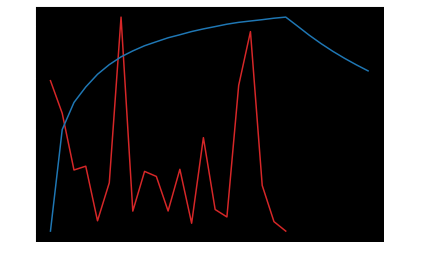

In [55]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Training loss')
ax1.plot(losses, color=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Accuracy')  # we already handled the x-label with ax1
ax2.plot(accuracies, color=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# plt.plot(losses, 'r-')
# plt.axes()
# plt.xlabel('Iterations')
# plt.ylabel('Training loss')
# plt.show()